In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from datetime import datetime
import random
import numpy as np

sys.path.append("../src")
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from real_data_desired_win_rate_reward import ProbabilityModel, BetaBernoulli, BiddingStrategy

In [3]:
cls = BetaBernoulli(1, 1000)  # Defining an instance of this BetaBernoulli with 1 win, 1000 loses as our prior
df = pd.read_csv("../data/data.csv")
df = df.query("placementType == 'interstitial'")
max_data_point = 20  # max value of bins
n_bins=1000
desired_win_rate=0.5

(0.0, 20.0)

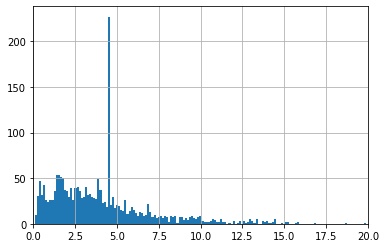

In [4]:
df.head(2000)['bidPrice'].hist(bins=1000)
plt.xlim(0, max_data_point)

In [5]:
format = "%m/%d/%Y, %H:%M:%S"
biddingStrategy = BiddingStrategy(n_bins=n_bins, max_bid=max_data_point, priors=[1]*n_bins, classifier=cls, desired_win_rate=desired_win_rate)
print ("Init done")
biddingStrategy.learn_priors(df, 1)
print ("Prior learnt")
print("Simulation Start:", datetime.now().strftime(format))
mean_regret = biddingStrategy.simulate_by_real_dataset(df.head(2000), 0.99)
print("Regret:", mean_regret)
# print(regret_arr)

Init done
Prior learnt
Simulation Start: 05/18/2021, 17:26:05
Regret: 6.307627535064505


In [6]:
# np.median(regret_arr)

In [7]:
for p,m in biddingStrategy.bid_model.items():
    print ("{p:0.3f} {t:0.2f} {f:0.2f}".format(p=p,t=m.prior_T,f=m.prior_F))

0.020 0.00 1.00
0.040 0.00 1.00
0.060 0.00 1.00
0.080 0.00 1.00
0.100 0.02 0.98
0.120 0.02 0.98
0.140 0.02 0.98
0.160 0.02 0.98
0.180 0.03 0.97
0.200 0.03 0.97
0.220 0.03 0.97
0.240 0.03 0.97
0.260 0.04 0.96
0.280 0.05 0.95
0.300 0.07 0.93
0.320 0.09 0.91
0.340 0.10 0.90
0.360 0.11 0.89
0.380 0.11 0.89
0.400 0.12 0.88
0.420 0.13 0.87
0.440 0.12 0.88
0.460 0.12 0.88
0.480 0.09 0.91
0.500 0.08 0.92
0.520 0.08 0.92
0.540 0.08 0.92
0.560 0.08 0.92
0.580 0.10 0.90
0.600 0.11 0.89
0.620 0.12 0.88
0.640 0.12 0.88
0.660 0.14 0.86
0.680 0.13 0.87
0.700 0.13 0.87
0.720 0.10 0.90
0.740 0.10 0.90
0.760 0.09 0.91
0.780 0.07 0.93
0.800 0.07 0.93
0.820 0.07 0.93
0.840 0.07 0.93
0.860 0.07 0.93
0.880 0.07 0.93
0.900 0.07 0.93
0.920 0.06 0.94
0.940 0.06 0.94
0.960 0.05 0.95
0.980 0.05 0.95
1.000 0.05 0.95
1.020 0.05 0.95
1.040 0.05 0.95
1.060 0.05 0.95
1.080 0.05 0.95
1.100 0.05 0.95
1.120 0.05 0.95
1.140 0.06 0.94
1.160 0.06 0.94
1.180 0.07 0.93
1.200 0.07 0.93
1.220 0.08 0.92
1.240 0.08 0.92
1.260 0.

<BarContainer object of 1000 artists>

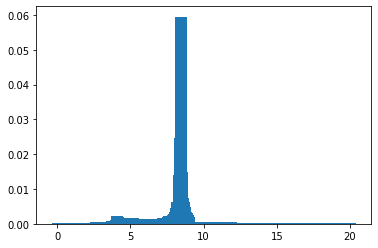

In [8]:
normalized_prbs_arr = list(biddingStrategy.parameters().values())
normalized_prbs_arr = biddingStrategy.normalize_probs(normalized_prbs_arr)
plt.bar(biddingStrategy.parameters().keys(),normalized_prbs_arr)

bid is: 0.0678689215101912
auction bid is: 0.41436213583347703


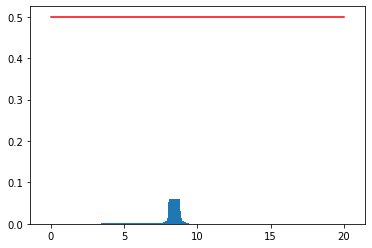

bid is: 0.5884987869018469
auction bid is: 0.4684292903623277


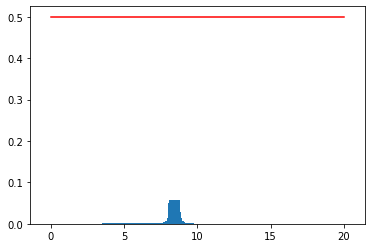

bid is: 0.886309436055839
auction bid is: 0.35549493745876415


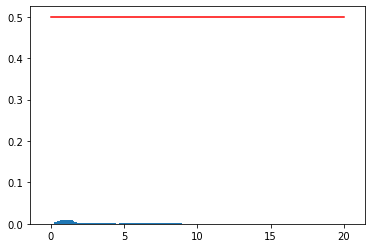

bid is: 0.8702963299110064
auction bid is: 0.49252355260469993


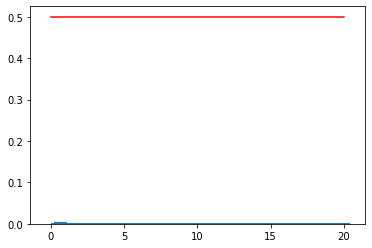

bid is: 0.011815221468567727
auction bid is: 0.49265520029887416


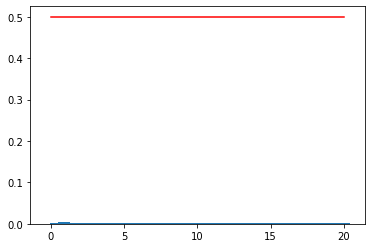

bid is: 0.9050025716516578
auction bid is: 0.3147453013876255


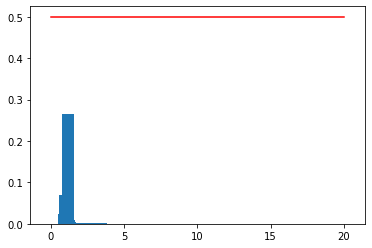

bid is: 0.010141075778950959
auction bid is: 0.4464235047534778


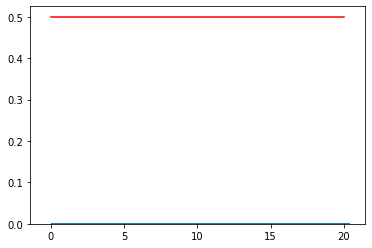

bid is: 0.18746728075195518
auction bid is: 0.48596682038329786


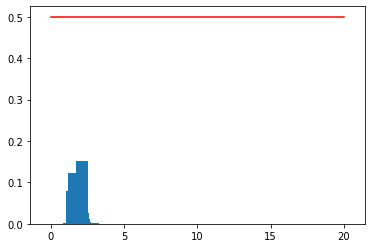

bid is: 0.9725663215284894
auction bid is: 0.42432640513942943


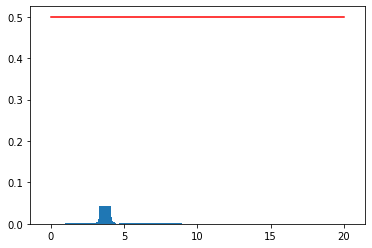

bid is: 0.7886103509438578
auction bid is: 0.46259705444684146


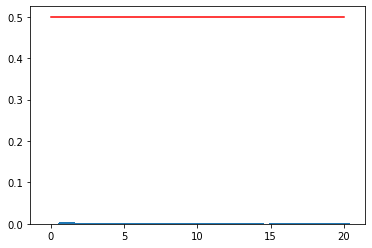

bid is: 0.4832767154696729
auction bid is: 0.36980059546366595


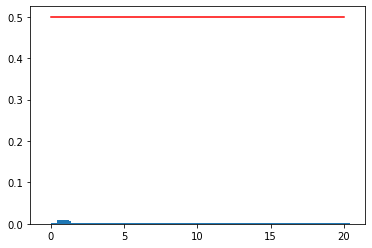

bid is: 0.2698349777494726
auction bid is: 0.35775452365102994


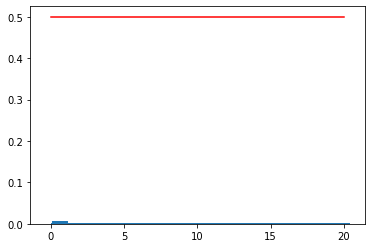

bid is: 0.43025858277528717
auction bid is: 0.33090319211794367


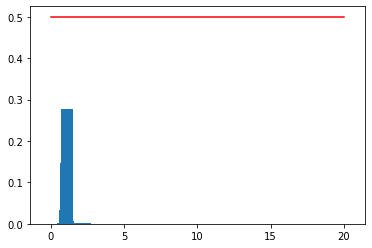

bid is: 0.22253668223887502
auction bid is: 0.45351373458311256


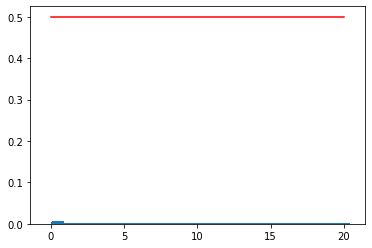

bid is: 0.9255264530226551
auction bid is: 0.4157985841213896


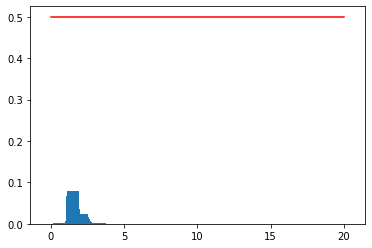

bid is: 0.4876735352284606
auction bid is: 0.3254333462888499


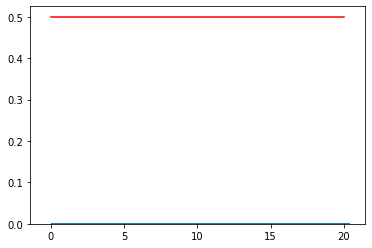

bid is: 0.9840530170508788
auction bid is: 0.3235866968142123


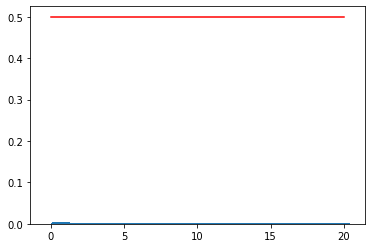

bid is: 0.8358499115748118
auction bid is: 0.4306560089784021


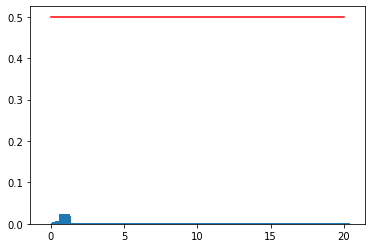

bid is: 0.9099798171601257
auction bid is: 0.42486512810826216


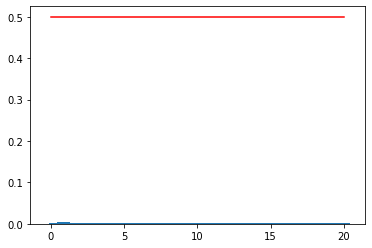

bid is: 0.704481724783553
auction bid is: 0.31711482664106555


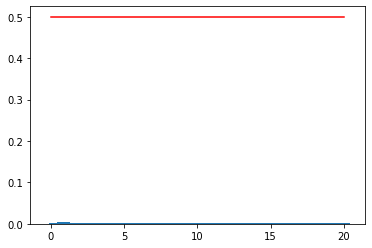

bid is: 0.9220949996873967
auction bid is: 0.3668204074574928


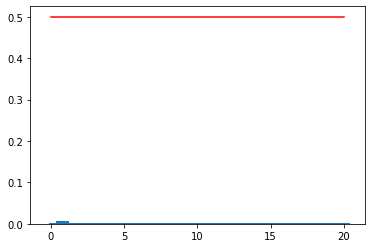

bid is: 0.8027774345010843
auction bid is: 0.3222740133579207


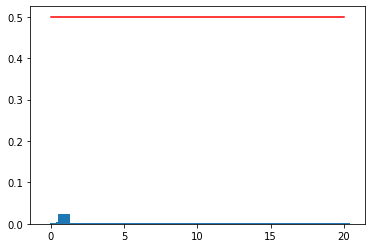

bid is: 0.6546623350753216
auction bid is: 0.45218526270813986


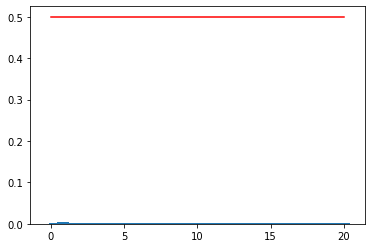

bid is: 0.3178904220341545
auction bid is: 0.35806470263643314


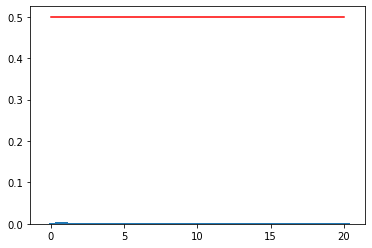

bid is: 0.274024318740532
auction bid is: 0.39727560644836907


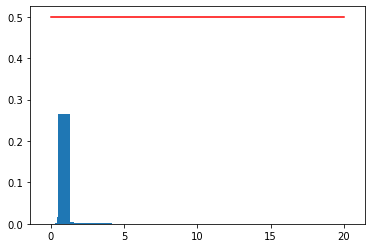

bid is: 0.7150742370084736
auction bid is: 0.31130776312912944


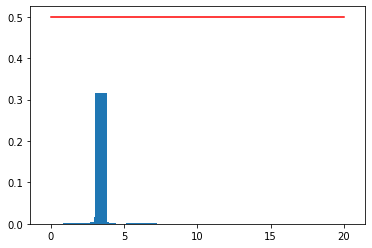

bid is: 0.17707996320229125
auction bid is: 0.3783673417290386


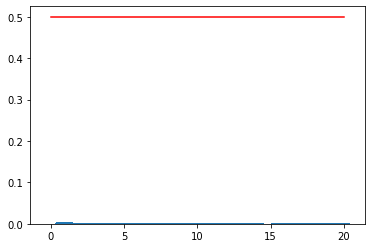

bid is: 0.140176091320539
auction bid is: 0.4377944284176002


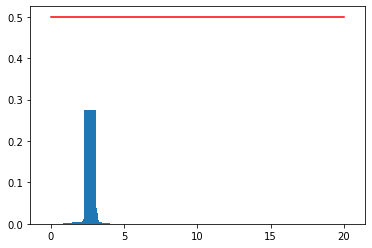

bid is: 0.045615785175475265
auction bid is: 0.3321799710410418


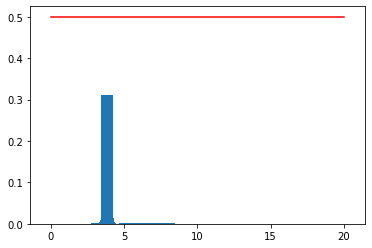

bid is: 0.7966189222411582
auction bid is: 0.49039581505021135


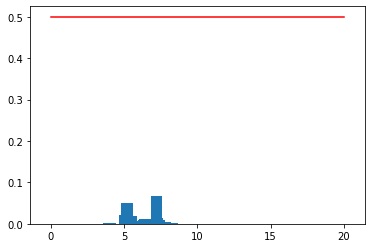

bid is: 0.5935838094540712
auction bid is: 0.3869280054103109


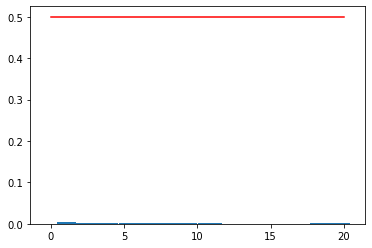

bid is: 0.0430896180052639
auction bid is: 0.4946568705619518


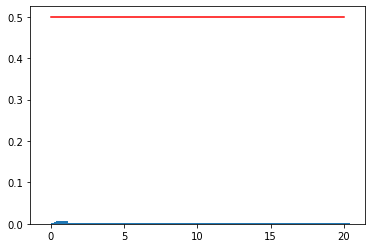

bid is: 0.1551459782419582
auction bid is: 0.3044003916625688


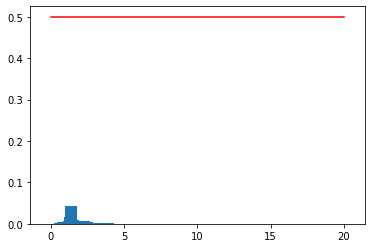

bid is: 0.29415357432786093
auction bid is: 0.42120258509207553


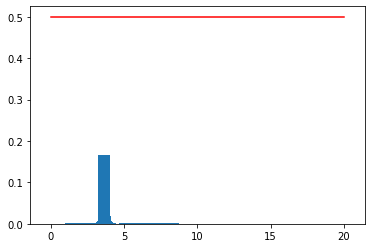

bid is: 0.5749335004778214
auction bid is: 0.3957915189901092


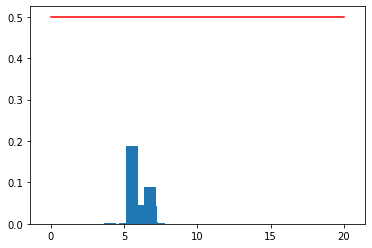

bid is: 0.5290793035269871
auction bid is: 0.40623683539913186


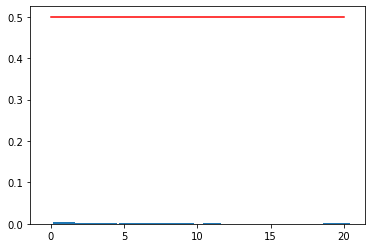

bid is: 0.6021874191547869
auction bid is: 0.3175605674726992


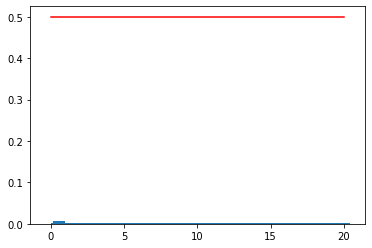

bid is: 0.13736638216583685
auction bid is: 0.4445228767915518


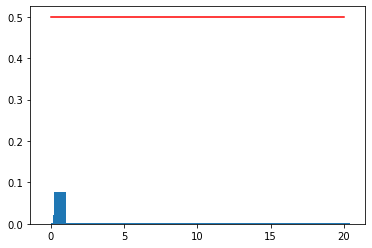

bid is: 0.6250661137650693
auction bid is: 0.48557806394880826


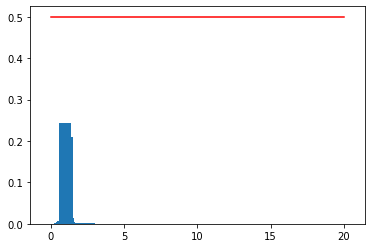

bid is: 0.3755390751029398
auction bid is: 0.4578126951131821


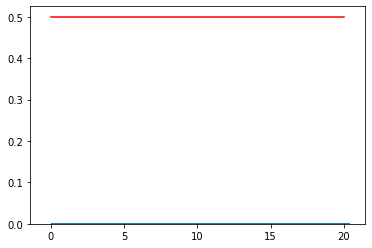

bid is: 0.5961016696866603
auction bid is: 0.3591262454466361


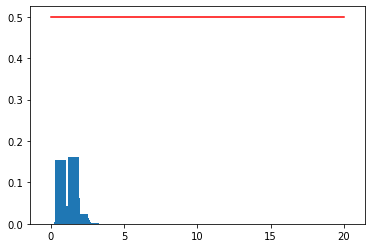

bid is: 0.8122162332779764
auction bid is: 0.4047128715389898


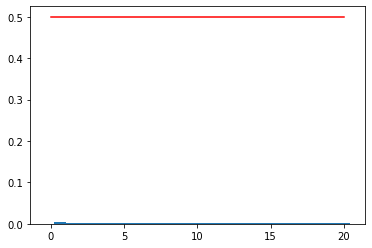

bid is: 0.06153377815852257
auction bid is: 0.32498543922897605


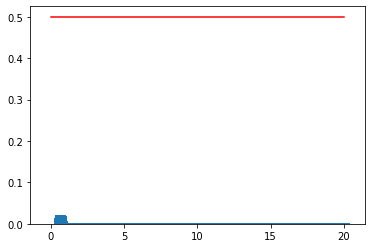

bid is: 0.261730846028402
auction bid is: 0.4905607827492665


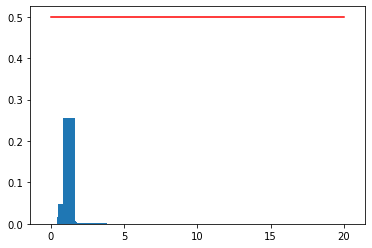

bid is: 0.7020442031160271
auction bid is: 0.3986992416422013


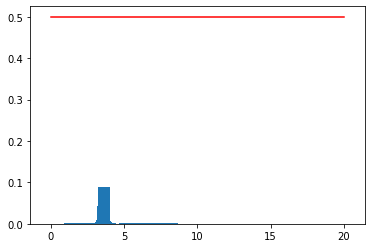

bid is: 0.0846039816345393
auction bid is: 0.4018700631945679


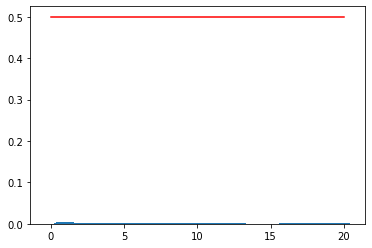

bid is: 0.43517620557171555
auction bid is: 0.39865466175799297


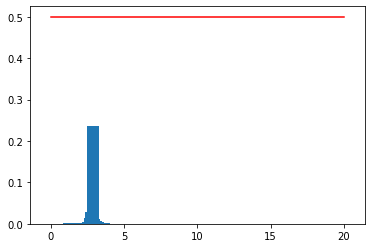

bid is: 0.8616444384456292
auction bid is: 0.3094811639482438


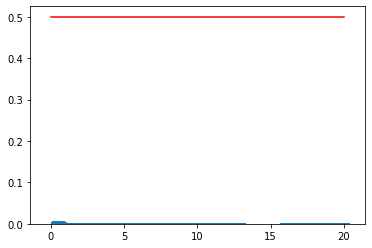

bid is: 0.54186356042823
auction bid is: 0.4083671275470191


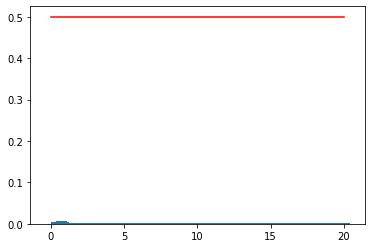

bid is: 0.12667782908380276
auction bid is: 0.3840907854734871


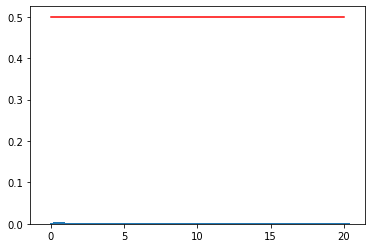

bid is: 0.5880101458530391
auction bid is: 0.38113150649661515


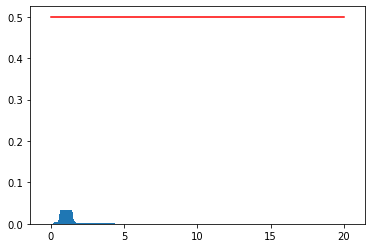

bid is: 0.361305673986959
auction bid is: 0.4918799732616385


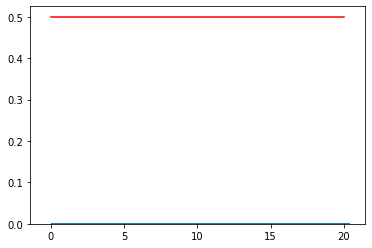

bid is: 0.15415945225942507
auction bid is: 0.3567289305038047


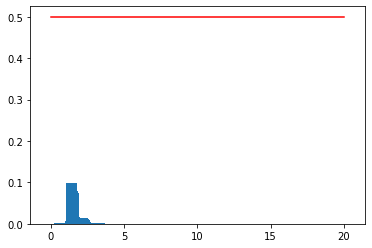

bid is: 0.5726084827054702
auction bid is: 0.34862629622340213


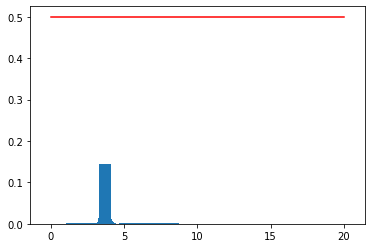

bid is: 0.020835423071251302
auction bid is: 0.4429322911147906


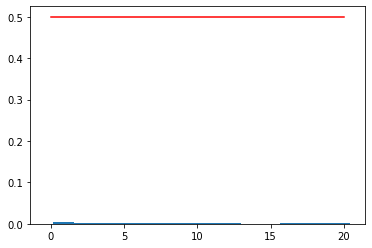

bid is: 0.4061660781794054
auction bid is: 0.31054619358845414


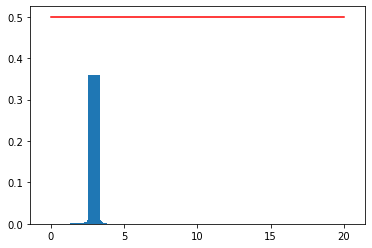

bid is: 0.11530905722394125
auction bid is: 0.44085707844227506


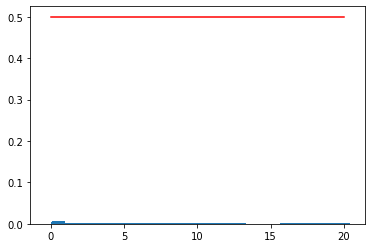

bid is: 0.6470256335662276
auction bid is: 0.3791901812356379


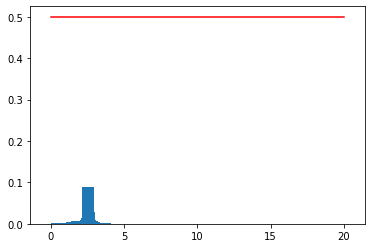

bid is: 0.0287073448435059
auction bid is: 0.3704318782720375


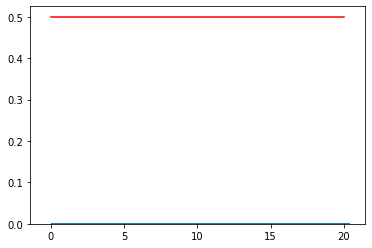

bid is: 0.0768082242495447
auction bid is: 0.40819540848675584


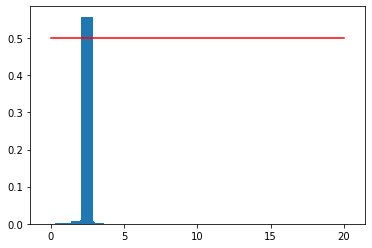

bid is: 0.19014438445127324
auction bid is: 0.41658767866124163


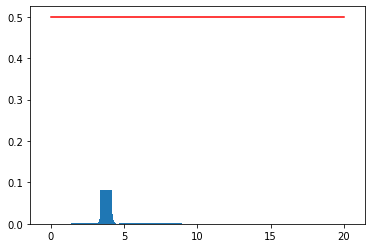

bid is: 0.886139186756709
auction bid is: 0.36890237659602143


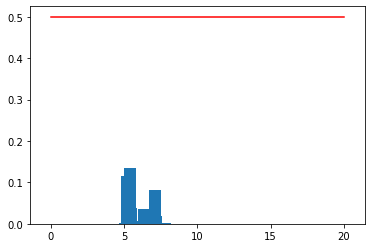

bid is: 0.27079874377016133
auction bid is: 0.3920828917807344


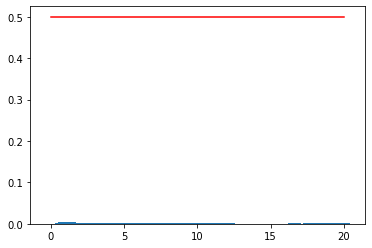

bid is: 0.27491357011499684
auction bid is: 0.4006054505402832


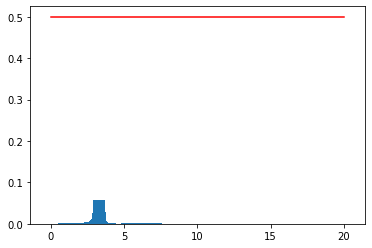

bid is: 0.9413868387069074
auction bid is: 0.30973206718413315


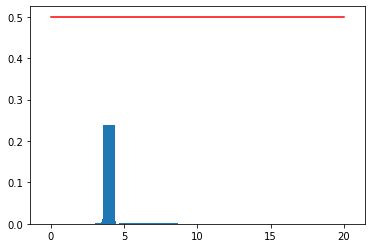

bid is: 0.43425620948380594
auction bid is: 0.48289506184315434


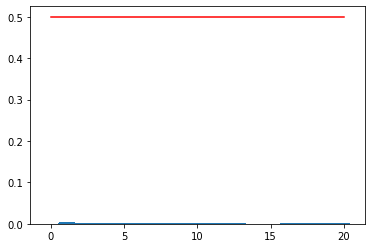

bid is: 0.051277858710589985
auction bid is: 0.38984591975809696


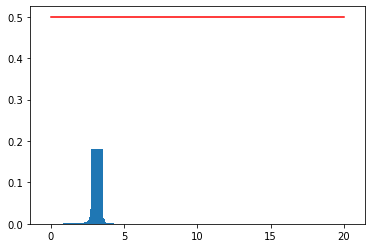

bid is: 0.08390731326926748
auction bid is: 0.42603857892422503


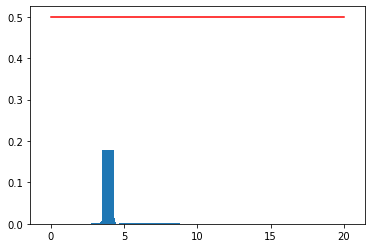

bid is: 0.0900221467467669
auction bid is: 0.39236534915823723


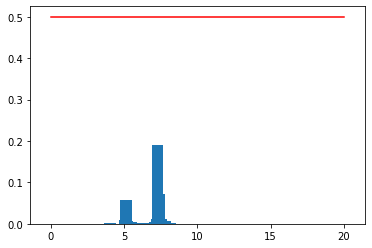

bid is: 0.5556485038477136
auction bid is: 0.37835771473810387


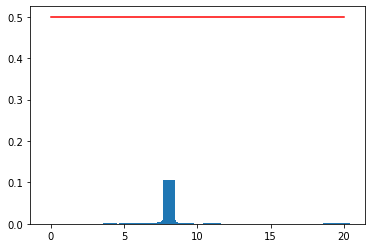

bid is: 0.14727284485123715
auction bid is: 0.34416685917690226


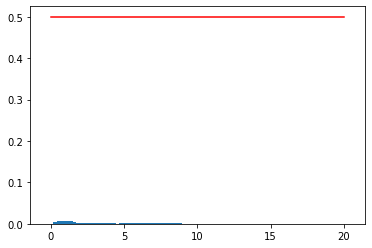

bid is: 0.2814716261443929
auction bid is: 0.4355408283640627


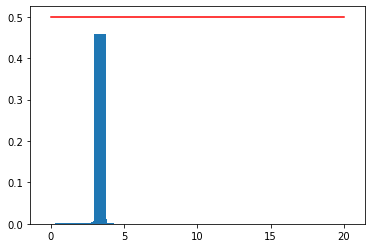

bid is: 0.6127725676189568
auction bid is: 0.395367649600468


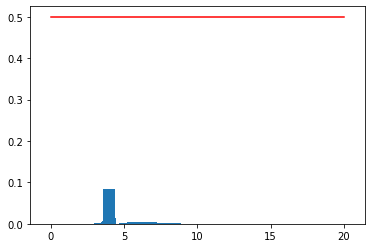

bid is: 0.7675235424443855
auction bid is: 0.46533309493736136


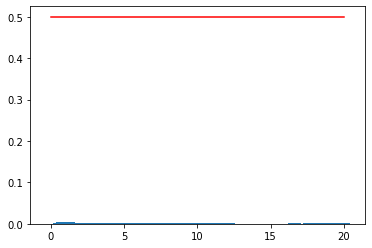

bid is: 0.9251077854209692
auction bid is: 0.4488468302306906


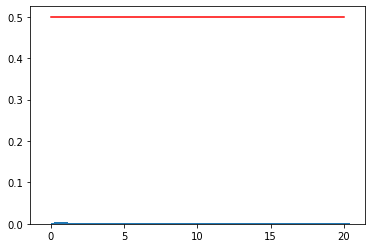

bid is: 0.40031294937464423
auction bid is: 0.4745121221911158


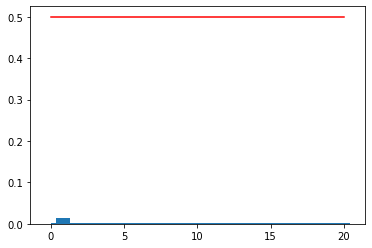

bid is: 0.2583518048563168
auction bid is: 0.3835797226880664


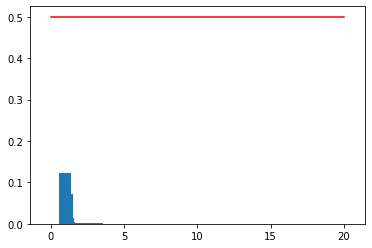

bid is: 0.3013394175182095
auction bid is: 0.4709874103005488


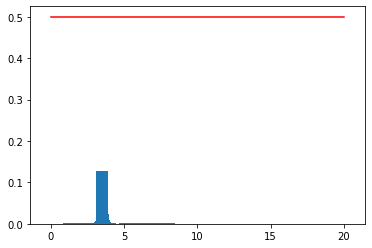

bid is: 0.2045892222683997
auction bid is: 0.43851709495085667


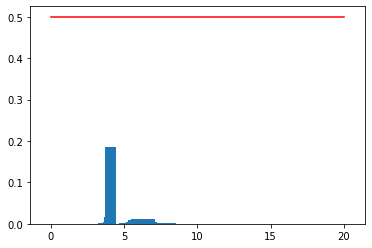

bid is: 0.22504541504850994
auction bid is: 0.30482498465810376


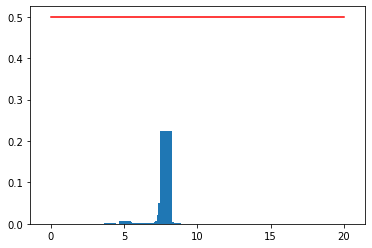

bid is: 0.9058762603370881
auction bid is: 0.3307226698447988


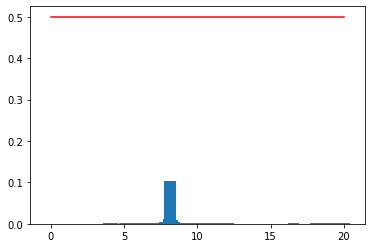

bid is: 0.4048615877284849
auction bid is: 0.3932920163812369


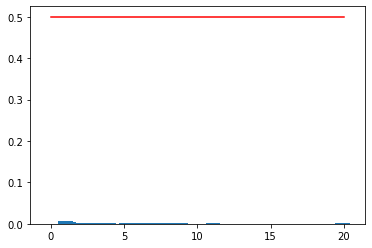

bid is: 0.5436961482777387
auction bid is: 0.3652456601455266


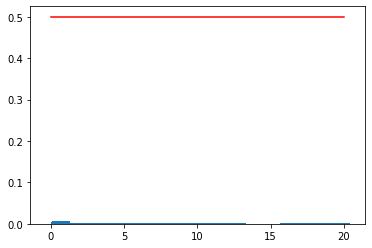

bid is: 0.2611223774162281
auction bid is: 0.4857648676311509


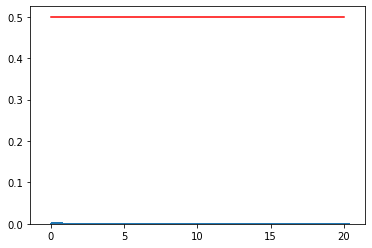

bid is: 0.7300000057874396
auction bid is: 0.33050446042016385


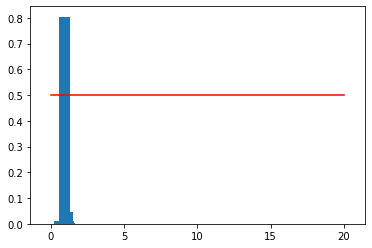

bid is: 0.5161676657641557
auction bid is: 0.41051589815992917


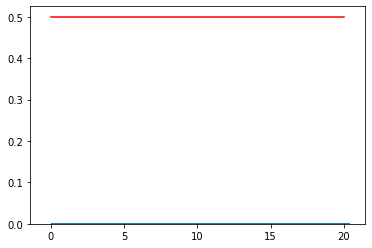

bid is: 0.07861304877423647
auction bid is: 0.44685024012441943


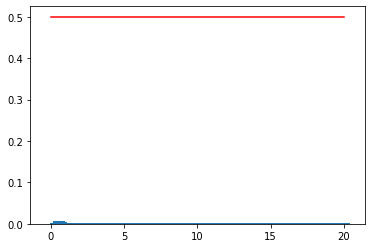

bid is: 0.7807977157242517
auction bid is: 0.455428759525034


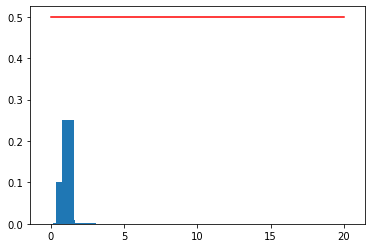

bid is: 0.7151528478974893
auction bid is: 0.4391696904104331


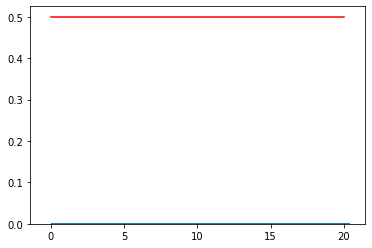

bid is: 0.9032893343889917
auction bid is: 0.38593185394388524


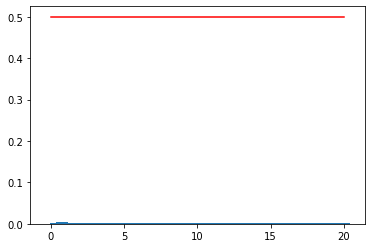

bid is: 0.19339347891088932
auction bid is: 0.49166405343444886


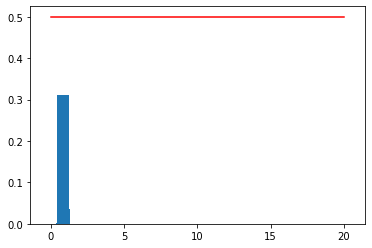

bid is: 0.09957937161509245
auction bid is: 0.4086312163252421


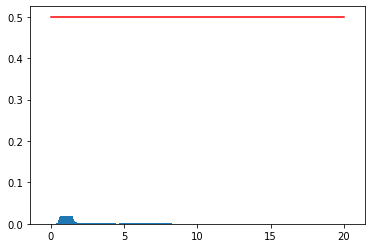

bid is: 0.6863315172203218
auction bid is: 0.31285364119835807


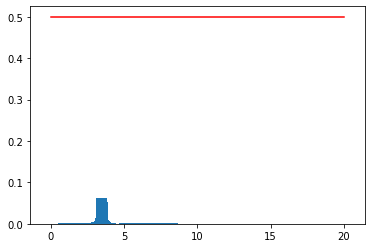

bid is: 0.900326432704099
auction bid is: 0.36692397377659847


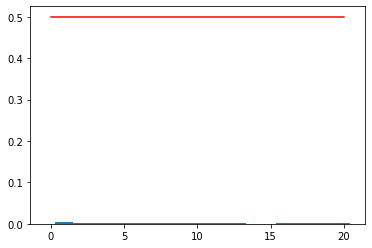

bid is: 0.40561159220579424
auction bid is: 0.43359876725783764


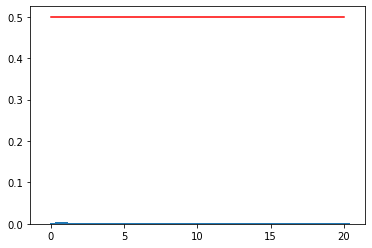

bid is: 0.925767133039431
auction bid is: 0.4608454349631156


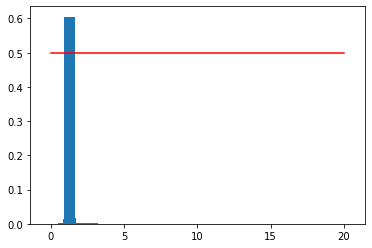

bid is: 0.08129043512583001
auction bid is: 0.4505325759656537


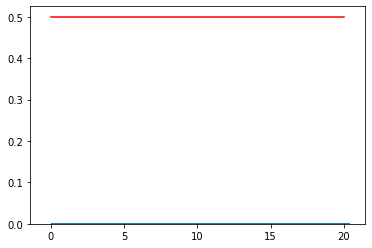

bid is: 0.5583307027844443
auction bid is: 0.34182250434832817


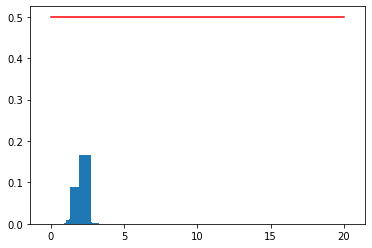

bid is: 0.8918113767098177
auction bid is: 0.4003957892478212


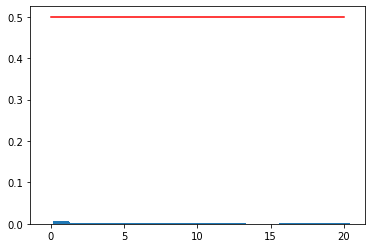

bid is: 0.6279727477181294
auction bid is: 0.43800604289647416


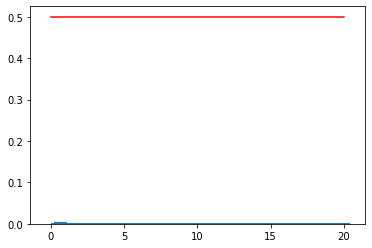

0.2854653829427478


In [9]:
reward_arr = []
bids_arr = []
win_lose_arr = []
probs_arr = []
params_arr = []
regret = 0
n_trials = 100

T_arr, F_arr = [], []

for i in range(0, n_trials):
    # b = biddingStrategy.bid([i]) # [i] is context, not used for now
    b = random.random()
    print("bid is:", b)
    normalized_prbs_arr = list(biddingStrategy.parameters().values())
    normalized_prbs_arr = biddingStrategy.normalize_probs(normalized_prbs_arr)
    params_arr.append(normalized_prbs_arr)
    T_arr. append(list(biddingStrategy.parameters("T").values()))
    F_arr. append(list(biddingStrategy.parameters("F").values()))
    
    auction_bid = 0.4 + (random.random() - 0.5) * 2 * 0.1 # generating some bid for the auction
    print("auction bid is:", auction_bid)
    
    bids_arr.append(b)
    win = b > auction_bid
    win_lose_arr.append(win)
    regret += np.abs(b - auction_bid)
    
    biddingStrategy.discount(0.99)
    
    r = biddingStrategy.reward(bid_price=b, won=win, context=[i])
    probs_arr.append(biddingStrategy.probabilities)
    reward_arr.append(r)
    
    # plot
    plt.bar(biddingStrategy.bid_model.keys(),params_arr[i])
    plt.plot(biddingStrategy.bid_model.keys(), np.ones(n_bins)*desired_win_rate, c='red')
    plt.show()
    

print(regret / n_trials)

In [10]:
# random - 0.4
# some_base_logic_base_on_notebook_graphs - 0.29
# our logic: 0.46-0.5

In [11]:
# Moving parts:
# n samples - agg strategy
# discount rate
# prior - moving part
# normalize probs


In [12]:
# TODO next steps:
# 1. Full code overview including documentation and cleaning and removal + config file of parameters
# 2. Plotting of a/a+b per each bandit (that is the expected value of each bandit) + std of each bandit (at this stage it's 100 bandits, but let's see)
# STD: a*b / [(a+b)^2 * (a+b+1)]
# 3. dive into context

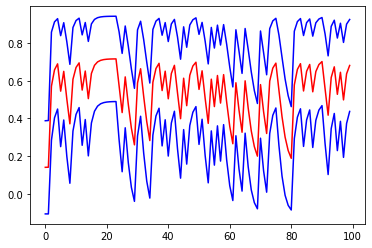

In [19]:
i=100
alpha = [t[i] for t in T_arr]
beta  = [f[i] for f in F_arr]
mean = np.array([a/(a+b) for a,b in zip(alpha, beta)])
std = np.sqrt([(a*b / ((a+b)**2 * (a+b+1))) for a,b in zip(alpha, beta)])
plt.plot(np.arange(n_trials),mean, c='r')
plt.plot(np.arange(n_trials),mean-std, c='b')
plt.plot(np.arange(n_trials),mean+std, c='b')

In [22]:
std

array([0.24622011, 0.24687899, 0.28565899, 0.25356631, 0.2389057 ,
       0.29334491, 0.25717669, 0.30286931, 0.31431207, 0.27370028,
       0.24807018, 0.23634542, 0.29186814, 0.25645829, 0.30253893,
       0.26188959, 0.24271537, 0.23382261, 0.22954513, 0.22744332,
       0.22639905, 0.22587728, 0.22561584, 0.22548465, 0.28513201,
       0.31279558, 0.26905926, 0.30787859, 0.31319571, 0.29877435,
       0.28045489, 0.25113935, 0.29995863, 0.31451431, 0.30409218,
       0.27924863, 0.25058904, 0.23752013, 0.29255749, 0.25679004,
       0.30269379, 0.26197533, 0.24275441, 0.29553225, 0.3144018 ,
       0.27169316, 0.30884389, 0.26573849, 0.24446446, 0.23465067,
       0.29086017, 0.2559761 , 0.30231262, 0.31437437, 0.2735388 ,
       0.30948618, 0.26619572, 0.30676699, 0.2643676 , 0.30602482,
       0.31375863, 0.30027801, 0.28014746, 0.31153691, 0.31116385,
       0.27667295, 0.31050912, 0.31191496, 0.29614089, 0.27835582,
       0.28331666, 0.31236855, 0.31037687, 0.27707396, 0.24959